In [2]:


## 🧠 Overview of the Model Pipeline



## 🐍 Full Python Code (step-by-step)


# inflation_forecast_2026.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# ------------------------
# STEP 1: Load Data
# ------------------------
df = pd.read_csv("inflation_project_2000_2024_weekly_expanded.csv", parse_dates=["Date"])
df = df.sort_values("Date")

# ------------------------
# STEP 2: Create Target
# ------------------------
# Predict 12 weeks ahead inflation
df["Inflation_Target"] = df["Inflation_YoY_pct"].shift(-12)
df = df.dropna()

# ------------------------
# STEP 3: Select Features
# ------------------------
features = [
    "CPI_Index", "WPI_Index", "Repo_Rate_pct", "M3_billion",
    "GDP_Growth_annual_pct", "Unemployment_pct", "ExchangeRate_LCY_per_USD",
    "CrudeOil_USD_per_barrel", "Commodity_Index", "Stock_Index",
    "Inflation_YoY_pct_lag1", "Inflation_YoY_pct_lag4", "Inflation_YoY_pct_lag12",
    "CPI_Index_ma4", "CPI_Index_ma12"
]

X = df[features]
y = df["Inflation_Target"]

# ------------------------
# STEP 4: Split Train-Test
# ------------------------
train = df[df["Year"] <= 2022]
test = df[df["Year"] > 2022]

X_train, X_test = train[features], test[features]
y_train, y_test = train["Inflation_Target"], test["Inflation_Target"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# STEP 5A: XGBoost Model (ML)
# ------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

# ------------------------
# STEP 5B: LSTM Model (DL)
# ------------------------
# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_lstm, y_train, epochs=40, batch_size=32, validation_split=0.1, verbose=1)

y_pred_lstm = model.predict(X_test_lstm).flatten()

# ------------------------
# STEP 6: Evaluate Models
# ------------------------
def evaluate_model(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.3f}, R²: {r2:.3f}")

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lstm, "LSTM")

# ------------------------
# STEP 7: Ensemble (Hybrid)
# ------------------------
y_pred_hybrid = 0.6 * y_pred_xgb + 0.4 * y_pred_lstm
evaluate_model(y_test, y_pred_hybrid, "Hybrid (XGBoost + LSTM)")

# ------------------------
# STEP 8: Predict 2026 Inflation
# ------------------------
latest_data = df[df["Year"] == 2024].tail(12)[features]
latest_scaled = scaler.transform(latest_data)

# Predict for 2025-2026 horizon
future_pred_xgb = xgb.predict(latest_scaled)
future_pred_lstm = model.predict(latest_scaled.reshape((latest_scaled.shape[0], 1, latest_scaled.shape[1]))).flatten()
future_pred_hybrid = 0.6 * future_pred_xgb + 0.4 * future_pred_lstm

pred_2026 = np.mean(future_pred_hybrid)
print(f"\n📈 Predicted Inflation for 2026: {pred_2026:.2f}%")

# ------------------------
# STEP 9: Plot
# ------------------------
plt.figure(figsize=(10,5))
plt.plot(df["Date"].iloc[-len(y_test):], y_test, label="Actual")
plt.plot(df["Date"].iloc[-len(y_test):], y_pred_hybrid, label="Predicted (Hybrid)")
plt.title("Inflation Prediction (Test Period)")
plt.legend()
plt.show()



ModuleNotFoundError: No module named 'xgboost'

In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ------ --------------------------------- 9.2/56.8 MB 42.9 MB/s eta 0:00:02
   --------- ------------------------------ 13.6/56.8 MB 33.9 MB/s eta 0:00:02
   ----------- ---------------------------- 15.7/56.8 MB 25.3 MB/s eta 0:00:02
   ------------ --------------------------- 17.8/56.8 MB 20.7 MB/s eta 0:00:02
   -------------- ------------------------- 20.2/56.8 MB 18.9 MB/s eta 0:00:02
   --------------- ------------------------ 22.3/56.8 MB 17.2 MB/s eta 0:00:03
   ---------------- ----------------------- 24.1/56.8 MB 16.0 MB/s eta 0:00:03
   ------------------ --------------------- 26.5/56.8 MB 15.4 MB/s eta 0:00:02
   ------------------- -------------------- 28.3/56.8 MB 14.6 MB/s eta 0:00:02
   --------------------- ------------------ 30.4/56.8 MB 14.3 MB/s eta 0:00:02
   ---------------------- ----------------- 32.5/56.8 MB 13.8 MB/s eta 0:00:02
   ------------------------ --------------- 34.9/56.8 MB 13.5 

In [4]:
import xgboost as xgb
print(xgb.__version__)

3.0.5


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# ------------------------
# STEP 1: Load Data
# ------------------------
df = pd.read_csv("inflation_project_2000_2024_weekly_expanded.csv", parse_dates=["Date"])
df = df.sort_values("Date")

# ------------------------
# STEP 2: Create Target
# ------------------------
# Predict 12 weeks ahead inflation
df["Inflation_Target"] = df["Inflation_YoY_pct"].shift(-12)
df = df.dropna()

# ------------------------
# STEP 3: Select Features
# ------------------------
features = [
    "CPI_Index", "WPI_Index", "Repo_Rate_pct", "M3_billion",
    "GDP_Growth_annual_pct", "Unemployment_pct", "ExchangeRate_LCY_per_USD",
    "CrudeOil_USD_per_barrel", "Commodity_Index", "Stock_Index",
    "Inflation_YoY_pct_lag1", "Inflation_YoY_pct_lag4", "Inflation_YoY_pct_lag12",
    "CPI_Index_ma4", "CPI_Index_ma12"
]

X = df[features]
y = df["Inflation_Target"]

# ------------------------
# STEP 4: Split Train-Test
# ------------------------
train = df[df["Year"] <= 2022]
test = df[df["Year"] > 2022]

X_train, X_test = train[features], test[features]
y_train, y_test = train["Inflation_Target"], test["Inflation_Target"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# STEP 5A: XGBoost Model (ML)
# ------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

# ------------------------
# STEP 5B: LSTM Model (DL)
# ------------------------
# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_lstm, y_train, epochs=40, batch_size=32, validation_split=0.1, verbose=1)

y_pred_lstm = model.predict(X_test_lstm).flatten()

# ------------------------
# STEP 6: Evaluate Models
# ------------------------
def evaluate_model(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.3f}, R²: {r2:.3f}")

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lstm, "LSTM")

# ------------------------
# STEP 7: Ensemble (Hybrid)
# ------------------------
y_pred_hybrid = 0.6 * y_pred_xgb + 0.4 * y_pred_lstm
evaluate_model(y_test, y_pred_hybrid, "Hybrid (XGBoost + LSTM)")

# ------------------------
# STEP 8: Predict 2026 Inflation
# ------------------------
latest_data = df[df["Year"] == 2024].tail(12)[features]
latest_scaled = scaler.transform(latest_data)

# Predict for 2025-2026 horizon
future_pred_xgb = xgb.predict(latest_scaled)
future_pred_lstm = model.predict(latest_scaled.reshape((latest_scaled.shape[0], 1, latest_scaled.shape[1]))).flatten()
future_pred_hybrid = 0.6 * future_pred_xgb + 0.4 * future_pred_lstm

pred_2026 = np.mean(future_pred_hybrid)
print(f"\n📈 Predicted Inflation for 2026: {pred_2026:.2f}%")

# ------------------------
# STEP 9: Plot
# ------------------------
plt.figure(figsize=(10,5))
plt.plot(df["Date"].iloc[-len(y_test):], y_test, label="Actual")
plt.plot(df["Date"].iloc[-len(y_test):], y_pred_hybrid, label="Predicted (Hybrid)")
plt.title("Inflation Prediction (Test Period)")
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
!pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 9.7/332.0 MB 47.0 MB/s eta 0:00:07
   - -------------------------------------- 13.9/332.0 MB 34.0 MB/s eta 0:00:10
   - -------------------------------------- 15.7/332.0 MB 26.5 MB/s eta 0:00:12
   -- ------------------------------------- 16.8/332.0 MB 19.2 MB/s eta 0:00:17
   -- ------------------------------------- 20.7/332.0 MB 18.8 MB/s eta 0:00:17
   -- ------------------------------------- 23.1/332.0 MB 17.2 MB/s eta 0:00:18
   --- ------------------------------------ 25.4/332.0 MB 16.2 MB/s eta 0:00:19
   --- ------------------------------------ 27.5/332.0 MB 15.4 MB/s eta 0:00:20
   --- ------------------------------------ 29.6/332.0 MB 14.8 MB/s eta 0:00:21
   --- ------------------------------------ 31.7/332.0 MB 14.3 MB/s eta 0:00:22
   ---- ----------------------------------- 33.8/332.0 MB 13.9 MB/s eta 0:00:22
   ---- ----------------------------------- 35.9/3

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


Epoch 1/40


C:\Users\WELCOME1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 18.2326 - val_loss: 5.3915
Epoch 2/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.4224 - val_loss: 4.5806
Epoch 3/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4835 - val_loss: 3.3660
Epoch 4/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9098 - val_loss: 2.4834
Epoch 5/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2228 - val_loss: 2.3156
Epoch 6/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8082 - val_loss: 2.2831
Epoch 7/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4911 - val_loss: 2.2666
Epoch 8/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3398 - val_loss: 2.2408
Epoch 9/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1539 - val_loss: 2.1779
Epoch 10/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9923 - val_loss: 2.1296
Epoch 11/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9663 - val_loss: 2.1042
Epoch 12/40
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8225 - val_loss: 2.10

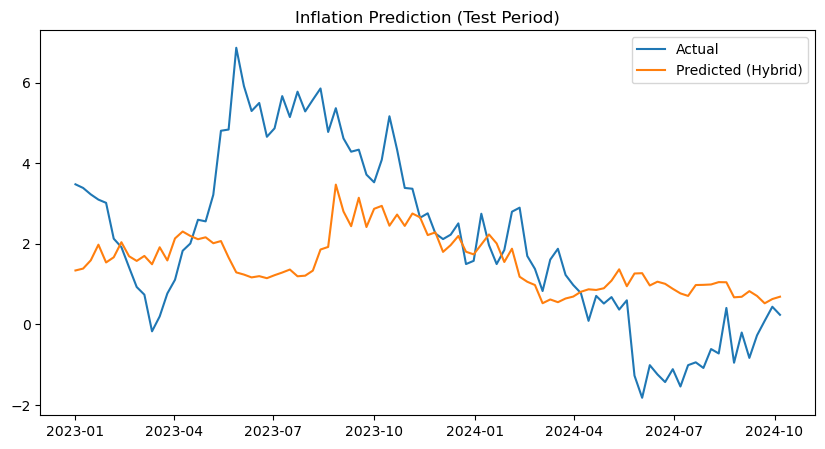

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# ------------------------
# STEP 1: Load Data
# ------------------------
df = pd.read_csv(r"C:\Users\WELCOME1\Downloads\inflation_project_2000_2024_weekly_expanded.csv", parse_dates=["Date"])
df = df.sort_values("Date")

# ------------------------
# STEP 2: Create Target
# ------------------------
# Predict 12 weeks ahead inflation
df["Inflation_Target"] = df["Inflation_YoY_pct"].shift(-12)
df = df.dropna()

# ------------------------
# STEP 3: Select Features
# ------------------------
features = [
    "CPI_Index", "WPI_Index", "Repo_Rate_pct", "M3_billion",
    "GDP_Growth_annual_pct", "Unemployment_pct", "ExchangeRate_LCY_per_USD",
    "CrudeOil_USD_per_barrel", "Commodity_Index", "Stock_Index",
    "Inflation_YoY_pct_lag1", "Inflation_YoY_pct_lag4", "Inflation_YoY_pct_lag12",
    "CPI_Index_ma4", "CPI_Index_ma12"
]

X = df[features]
y = df["Inflation_Target"]

# ------------------------
# STEP 4: Split Train-Test
# ------------------------
train = df[df["Year"] <= 2022]
test = df[df["Year"] > 2022]

X_train, X_test = train[features], test[features]
y_train, y_test = train["Inflation_Target"], test["Inflation_Target"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# STEP 5A: XGBoost Model (ML)
# ------------------------
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

# ------------------------
# STEP 5B: LSTM Model (DL)
# ------------------------
# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_lstm, y_train, epochs=40, batch_size=32, validation_split=0.1, verbose=1)

y_pred_lstm = model.predict(X_test_lstm).flatten()

# ------------------------
# STEP 6: Evaluate Models
# ------------------------
def evaluate_model(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.3f}, R²: {r2:.3f}")

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lstm, "LSTM")

# ------------------------
# STEP 7: Ensemble (Hybrid)
# ------------------------
y_pred_hybrid = 0.6 * y_pred_xgb + 0.4 * y_pred_lstm
evaluate_model(y_test, y_pred_hybrid, "Hybrid (XGBoost + LSTM)")

# ------------------------
# STEP 8: Predict 2026 Inflation
# ------------------------
latest_data = df[df["Year"] == 2024].tail(12)[features]
latest_scaled = scaler.transform(latest_data)

# Predict for 2025-2026 horizon
future_pred_xgb = xgb.predict(latest_scaled)
future_pred_lstm = model.predict(latest_scaled.reshape((latest_scaled.shape[0], 1, latest_scaled.shape[1]))).flatten()
future_pred_hybrid = 0.6 * future_pred_xgb + 0.4 * future_pred_lstm

pred_2026 = np.mean(future_pred_hybrid)
print(f"\n📈 Predicted Inflation for 2026: {pred_2026:.2f}%")

# ------------------------
# STEP 9: Plot
# ------------------------
plt.figure(figsize=(10,5))
plt.plot(df["Date"].iloc[-len(y_test):], y_test, label="Actual")
plt.plot(df["Date"].iloc[-len(y_test):], y_pred_hybrid, label="Predicted (Hybrid)")
plt.title("Inflation Prediction (Test Period)")
plt.legend()
plt.show()

In [2]:
import os
print(os.getcwd())

C:\Users\WELCOME1\Documents
